In [8]:
import cvxpy as cp
import numpy as np

d = np.array([3.5, 2])
# Define the variables
u1 = cp.Variable()
u2 = cp.Variable()

# Define the Nash welfare criterion
N = cp.log(u1 - d[0]) + cp.log(u2 - d[1])

# Define the feasible set
F = [u1 - 3.5 >= 0, u2 - 2 >= 0, u1 + 2*u2 - 12 <= 0 , 2*u1 + u2 - 12 <= 0]

# Solve the optimization problem
problem = cp.Problem(cp.Maximize(N), F)
problem.solve()

# Display the results
print("Nash bargaining solution:")
print("u1 =", u1.value)
print("u2 =", u2.value)
print("Primal optimal value:", problem.value)
print("Optimal dual variables for the constraints:")
print(problem.constraints[0].dual_value)
print(problem.constraints[1].dual_value)
print(problem.constraints[2].dual_value)
print(problem.constraints[3].dual_value)

Nash bargaining solution:
u1 = 4.249999934632127
u2 = 3.5000001073274585
Primal optimal value: 0.11778302005085223
Optimal dual variables for the constraints:
3.2030291161353597e-09
1.5364272064072008e-09
3.6172218270964887e-09
0.6666667549227455


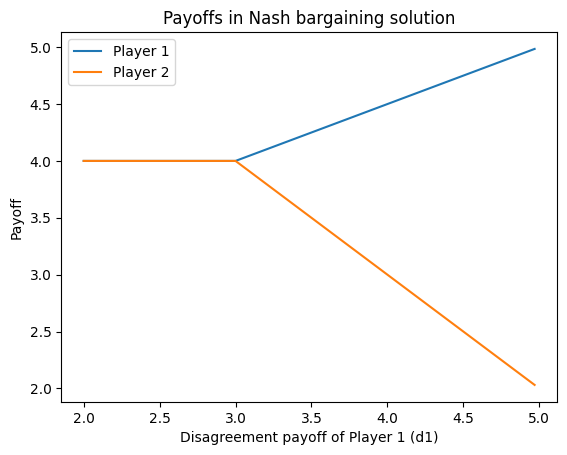

In [11]:

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Define the fixed value of d2
d2 = 2

d = np.array([2, 5])

# Define the variables
u1 = cp.Variable()
u2 = cp.Variable()

# Define the range of d1 values
d1_vals = np.linspace(2, 5, 100)

# Define the constraints
constraints = [u1 + 2*u2 - 12 <= 0,2*u1 + u2 - 12<= 0,u1 - 2 >= 0,u2 - d2 >= 0]

# Initialize arrays to store the payoffs for each player
player1_payoffs = []
player2_payoffs = []

# Solve the problem for each value of d1 and store the payoffs
for d1 in d1_vals:
    obj = cp.log(u1 - d1) + cp.log(u2 - d2)
    problem = cp.Problem(cp.Maximize(obj), constraints)
    problem.solve()
    player1_payoffs.append(u1.value)
    player2_payoffs.append(u2.value)

# Plot the payoffs as a function of d1
plt.plot(d1_vals, player1_payoffs, label="Player 1")
plt.plot(d1_vals, player2_payoffs, label="Player 2")
plt.xlabel("Disagreement payoff of Player 1 (d1)")
plt.ylabel("Payoff")
plt.title("Payoffs in Nash bargaining solution")
plt.legend()
plt.show()